# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [75]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [76]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [77]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

In [78]:
#Create dataframe with list of cities 
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

Beginning Data Retrieval
----------------------


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [79]:
print("Beginning Data Retrieval")
print("----------------------")

#Iterate over each row

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("----------------------")
print("Data Retrieval Complete")
print("----------------------")

Beginning Data Retrieval
----------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | ola
Processing Record 3 of Set 1 | laguna
Processing Record 4 of Set 1 | vanderhoof
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | kruisfontein
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | wahiawa
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | tommot
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | turkan
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | gilbues
City n

Processing Record 34 of Set 4 | sesheke
Processing Record 35 of Set 4 | hilo
Processing Record 36 of Set 4 | gorontalo
Processing Record 37 of Set 4 | gbongan
Processing Record 38 of Set 4 | port lincoln
Processing Record 39 of Set 4 | cayenne
Processing Record 40 of Set 4 | dingle
Processing Record 41 of Set 4 | cherskiy
City not found. Skipping...
Processing Record 42 of Set 4 | vakhsh
Processing Record 43 of Set 4 | port hedland
Processing Record 44 of Set 4 | prince albert
Processing Record 45 of Set 4 | carnot
Processing Record 46 of Set 4 | khatanga
Processing Record 47 of Set 4 | novaya zaimka
City not found. Skipping...
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | rorvik
Processing Record 1 of Set 5 | campbellton
Processing Record 2 of Set 5 | lorengau
City not found. Skipping...
Processing Record 3 of Set 5 | helong
Processing Record 4 of Set 5 | saint-paul
Processing Record 5 of Set 5 | arco
Processing Record 6 of Set 5 | novyy urengoy
City not fo

Processing Record 18 of Set 8 | aurora
Processing Record 19 of Set 8 | tual
Processing Record 20 of Set 8 | taltal
Processing Record 21 of Set 8 | birjand
Processing Record 22 of Set 8 | rio tercero
Processing Record 23 of Set 8 | novo aripuana
Processing Record 24 of Set 8 | ampanihy
Processing Record 25 of Set 8 | mosetse
Processing Record 26 of Set 8 | koungheul
Processing Record 27 of Set 8 | salina cruz
Processing Record 28 of Set 8 | teluknaga
Processing Record 29 of Set 8 | russell
Processing Record 30 of Set 8 | santa vitoria do palmar
Processing Record 31 of Set 8 | ginir
Processing Record 32 of Set 8 | ixtapa
Processing Record 33 of Set 8 | panguna
Processing Record 34 of Set 8 | bitung
Processing Record 35 of Set 8 | fortuna
Processing Record 36 of Set 8 | mount gambier
City not found. Skipping...
City not found. Skipping...
Processing Record 37 of Set 8 | trairi
Processing Record 38 of Set 8 | port blair
Processing Record 39 of Set 8 | akhalgori
Processing Record 40 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [80]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,arraial do cabo,40,BR,1574166731,64,-22.84,-46.65,77.00,8.05
1,ola,0,RU,1574167076,77,59.58,151.30,10.24,12.77
2,laguna,56,BZ,1574166738,93,16.17,-88.94,66.20,3.04
3,vanderhoof,57,CA,1574167076,95,54.02,-124.02,27.52,3.40
4,ancud,99,CL,1574166705,87,-41.87,-73.83,53.60,17.22


In [81]:
weather_dataframe.count()

City          520
Cloudiness    520
Country       520
Date          520
Humidity      520
Lat           520
Lng           520
Max Temp      520
Wind Speed    520
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

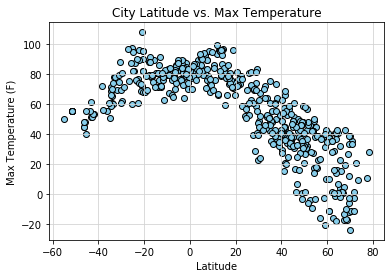

In [82]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figure1.png")
plt.show()

#### Latitude vs. Humidity Plot

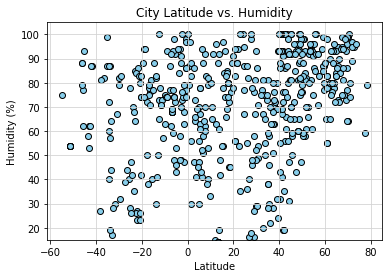

In [83]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figure2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

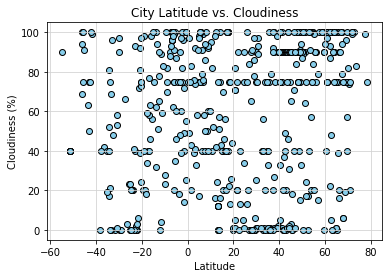

In [84]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figure3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

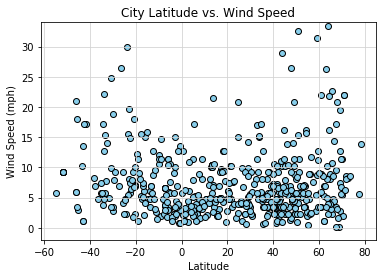

In [85]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figure4.png")
plt.show()